# Class Imbalance

One of the common roadblocks faced by ML Engineers are class imbalances. In this tutorial, we will explore the problem of 
class imbalance and discuss strategies to handle them.

<br>
<center>
<img src="./assets/class_imbalance.png" width="750">
</center>
<br>

__What is Class Imbalance?__


Imbalanced datasets are those where the distribution of classes are significantly skewed, with one class being dominant while the others are under represented. Such datasets pose unique challenges when it comes to building effective ML models.

In part 1 of this tutorial, we will explore various metrics used to evaluate imbalanced datasets and demonstrate how they provide a more comprehensive evaluation of model performance when compared to accuracy.

The metrics we will explore are as follows - 
- Precision
- Recall
- F1 Score
- ROC Curve

Finally, in part 2 of this tutorial we will conclude by exploring various strategies to overcome the challenges posed by imbalanced datasets and improve the performance of our machine learning models.

The strategies which will be covered are -
- Resampling Techniques
- Ensemble Methods
- Cost Sensitive Learning

We will be using the following libraries in this tutorial - 
- [Imbalanced-learn](https://imbalanced-learn.org/)
- [Pandas](https://pandas.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/) 
- [Plotly](https://plotly.com/)
- [Numpy](https://numpy.org/)

__So let's get started!__

First let's install and import the necessary libraries


In [317]:
# %pip install --upgrade imblearn pandas scikit-learn plotly nbformat numpy --quiet

In [318]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

# SK Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler

# Imbalanced Learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Let's create a dummy imbalanced dataset!

In [319]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of instances
n_instances = 1000

# Define the class imbalance ratio
imbalance_ratio = 0.8

# Create the fruit column randomly
fruit = np.random.choice(['apples', 'oranges'], size=n_instances)

# Create the target column with imbalance
target = np.random.choice([1, 0], size=n_instances, p=[imbalance_ratio, 1 - imbalance_ratio])

# Create the DataFrame
df = pd.DataFrame({'Fruit': fruit, 'Target': target})

In [320]:
df.head()

,Fruit,Target
0,apples,1
1,oranges,1
2,apples,1
3,apples,0
4,apples,1


In [321]:
# Calculate class counts
class_counts = df['Target'].value_counts()

# Create a bar plot to visualize class imbalance
fig = px.bar(
    class_counts,
    x=class_counts.index,
    y=class_counts.values,
    labels={'x': 'Target', 'y': 'Count'},
    title='Class Imbalance'
)
fig.show()

### Binary Classification

First let's prepare the dataset for classification by label encoding the categorical column __Fruit__ 

A detailed guide on Encoding Strategies can be found here - [LINK](https://www.youtube.com/watch?v=hScdIm7BEnk&feature=youtu.be&ab_channel=AlisterLuiz)

In [322]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Fruit' column
df['Fruit_Encoded'] = label_encoder.fit_transform(df['Fruit'])

# Re-arrange columns for readability
df = df[['Fruit', 'Fruit_Encoded', 'Target']]

In [323]:
df.head()

,Fruit,Fruit_Encoded,Target
0,apples,0,1
1,oranges,1,1
2,apples,0,1
3,apples,0,0
4,apples,0,1


In [324]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Fruit_Encoded'],  # Input features
    df['Target'],     # Target variable
    test_size=0.2,    # 80% training, 20% testing
    random_state=42
)

In [325]:
# Sample X_train
X_train[:5].values

array([1, 1, 1, 1, 0])

In [326]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800,), (800,), (200,), (200,))

In [327]:
# Reshape X Train and Test Series
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [328]:
X_train[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [329]:
# Create and train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [330]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

### Part 1 - Evaluation Metrics for Imbalanced Datasets

#### Confusion Matrix

Before diving deep into Accuracy, Precision, Recall, and F1 Score; it is important that we demystify the confusion behind confusion matrices :)

<center>
<img src="./assets/confusion_matrix.png" width="450">
</center>

Let's see an example,

<center>
<img src="./assets/confusion_matrix_example.webp" width="500">
</center>


Lets interpret the results,
<center>
<br>

__True Positive__

Interpretation: You predicted positive and it’s true.

You predicted that a cat is indeed a cat.

<br>

__True Negative__

Interpretation: You predicted negative and it’s true.

You predicted that a dog is indeed a dog.

<br>

__False Positive (Type 1 Error)__

Interpretation: You predicted positive and it’s false.

You predicted that it is a cat however it's a dog.

<br>

__False Negative (Type 2 Error)__

Interpretation: You predicted negative and it’s false.

You predicted that it's a dog however it's a cat.

</center>


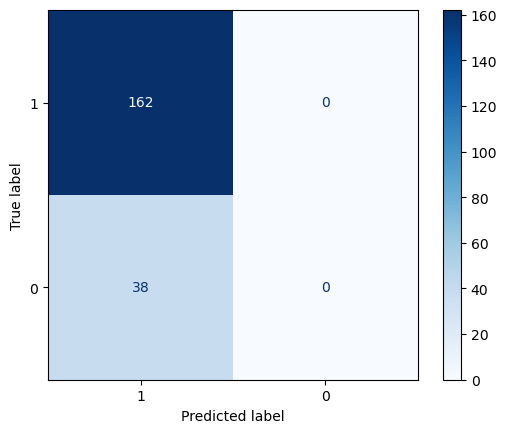

In [331]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])

# Plot the confusion matrix
disp.plot(cmap="Blues")

#### Accuracy

Accuracy can be defined as the ratio of correct predictions to the total number of predictions made by the model.


\begin{align}
Accuracy = \frac{Number \hspace{0.2em} of \hspace{0.2em} Correct \hspace{0.2em} Predictions}{Total \hspace{0.2em} Number \hspace{0.2em} of \hspace{0.2em} Predictions}
\end{align}

In [332]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy*100:.2f} %")

Accuracy: 81.00 %


### Precision

Precision can be defined as from all the classes we have predicted as positive, how many are actually positive.

\begin{align}
Precision = \frac{True \hspace{0.2em} Positive}{True \hspace{0.2em} Positive + False \hspace{0.2em} Positive}
\end{align}

In [333]:
# Calculate precision
precision = precision_score(y_test, y_pred)

# Print the precision
print(f"Precision: {precision*100:.2f} %")

Precision: 81.00 %


### Recall

Recall can be defined as from all the positive classes, how many have we predicted correctly.

\begin{align}
Recall = \frac{True \hspace{0.2em} Positive}{True \hspace{0.2em} Positive + False \hspace{0.2em} Negative}
\end{align}

In [334]:
# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the recall
print(f"Recall: {recall*100:.2f} %")

Recall: 100.00 %


A summary of Precision and Recall is given below,

<center>
<img src="./assets/precision_recall_summary.webp" width="400">
</center>

### F1 Score

Since it's difficult to compare two models with low precision and high recall or vice versa, we use F1 Score. 


\begin{align}
F1 \hspace{0.2em} Score = \frac{2 \times Recall \times Precision}{Recall + Precision}
\end{align}

F1 Score utilizes Harmonic Mean between precision and recall and punishes the extreme values more.

In [335]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred)

# Print the F1 Score
print(f"F1 Score: {f1*100:.2f} %")

F1 Score: 89.50 %


### ROC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

This curve plots two parameters -
- True Positive Rate
- False Positive Rate

<center>
<img src="./assets/roc_curve.png" width="300">
</center>

In [336]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

# Print the AUC-ROC Score
print(f"AUC-ROC Score: {auc_roc*100:.2f} %")

AUC-ROC Score: 50.00 %


In [337]:
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Create a DataFrame with fpr and tpr values
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

# Plot the ROC curve using Plotly Express
fig = px.line(roc_df, x='False Positive Rate', y='True Positive Rate', title='ROC Curve')
fig.add_shape(type='line', line=dict(dash='dash'), x0=0, y0=0, x1=1, y1=1)

# Display the AUC-ROC score and plot the ROC curve
fig.show()

Since the accuracy is high while the ROC AUC score is 50%, it indicates that the classifier is performing poorly in terms of distinguishing between the positive and negative classes.


This scenario typically occurs when we have an imbalanced dataset or when the classifier is not able to capture the underlying patterns effectively.

# Part 2 - Overcoming Class Imbalance

In this section, we will explore various strategies to tackle class imbalance in Machine Learning.

We'll dive into the following techniques,
- Cost-sensitive Learning 
- Resampling Techniques 
- Ensemble Methods

These strategies will help us overcome the challenges posed by imbalanced datasets and improve the performance of our models.

Download the dataset used for this tutorial - [HERE](https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice)

__Let's get started__

We will be comparing the Accuracy and F1 Scores for each model at the end of this tutorial.

In [338]:
# Global Variable to track scores
log_metrics = []

Since we will be retraining and evaluating our model after each strategy, let's create a function that can be called multiple times and makes our lives easier. 

In [339]:
def evaluate(classifier, classifier_name, X_test, y_test):
    """
    Evaluates the Model after
    overcoming the class imbalance problem.

    Args:
        classifier (object): ML Model
    """
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    # Calculate AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred)

    # Print the accuracy
    print(f"Accuracy: {accuracy*100:.2f} %")
    # Print the precision
    print(f"Precision: {precision*100:.2f} %")
    # Print the recall
    print(f"Recall: {recall*100:.2f} %")
    # Print the F1 Score
    print(f"F1 Score: {f1*100:.2f} %")
    # Print the AUC-ROC Score
    print(f"AUC-ROC Score: {auc_roc*100:.2f} %")

    # Log the Accuracy and F1 Score
    log_metrics.append(
        {
            'model': classifier_name,
            'accuracy': accuracy * 100,
            'f1_score': f1 * 100
        }
    )

In [340]:
df = pd.read_csv('aug_train.csv')
df.set_index('id', inplace=True)

In [341]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [342]:
df.shape

(382154, 11)

In [343]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1],  # Input features
    df.iloc[:, -1],     # Target variable
    test_size=0.2,    # 80% training, 20% testing
    random_state=42
)

In [344]:
# Calculate class counts
class_counts = df['Response'].value_counts()

# Create a bar plot to visualize class imbalance
fig = px.bar(
    class_counts,
    x=class_counts.index,
    y=class_counts.values,
    labels={'x': 'Class', 'y': 'Count'},
    title='Class Imbalance'
)
fig.show()

In [345]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Categorical Columns 
cat_col = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

# Encode all columns
X_train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']] = X_train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']].apply(LabelEncoder().fit_transform)

# Test Set
X_test[['Gender', 'Vehicle_Age', 'Vehicle_Damage']] = X_test[['Gender', 'Vehicle_Age', 'Vehicle_Damage']].apply(LabelEncoder().fit_transform)

In [346]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
380337,1,30,1,28.0,1,1,0,60954.0,152.0,127
282196,1,26,1,6.0,1,1,0,24532.0,152.0,216
60095,1,40,1,0.0,0,0,1,2630.0,47.0,220
124730,1,25,1,8.0,1,1,0,44259.0,152.0,223
474060,0,26,1,28.0,1,1,0,33615.0,152.0,194


In [347]:
# Fit data on Imbalanced Dataset
classifier = LogisticRegression(max_iter=1000, n_jobs=-1, verbose=True)
classifier.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11911D+05    |proj g|=  3.10003D+09

At iterate   50    f=  1.31914D+05    |proj g|=  8.28687D+04

At iterate  100    f=  9.48936D+04    |proj g|=  1.67763D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    105    133      1     0     0   1.833D+04   9.489D+04
  F =   94893.530283531407     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=1000, n_jobs=-1, verbose=True)

In [348]:
evaluate(classifier, 'Logistic Regression', X_test, y_test)

Accuracy: 82.93 %
Precision: 46.21 %
Recall: 19.38 %
F1 Score: 27.31 %
AUC-ROC Score: 57.45 %


### Cost Sensitive Learning

 In this section, we will delve into cost-sensitive learning, an approach specifically designed to handle class imbalance by assigning different misclassification costs to different classes. 
 
 Cost-sensitive learning allows the model to account for the imbalance and optimize its performance accordingly.

#### Class Weights

One simple and effective way to incorporate cost-sensitivity is by assigning different weights to each class during model training. By assigning higher weights to the minority class, we can signal to the model that misclassifying instances from the minority class is more costly.

In [349]:
# Create an instance of the Logistic Regression classifier with balanced class weights
classifier = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1, verbose=True)

# Train the classifier on the original or resampled dataset
classifier.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11911D+05    |proj g|=  1.07844D+08


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  2.01550D+05    |proj g|=  1.72380D+05

At iterate  100    f=  2.00105D+05    |proj g|=  4.71781D+07

At iterate  150    f=  1.25992D+05    |proj g|=  7.92654D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    191    233      1     0     0   1.785D+05   1.244D+05
  F =   124423.48045557158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   verbose=True)

In [350]:
evaluate(classifier, 'LR with Class Weights', X_test, y_test)

Accuracy: 70.41 %
Precision: 35.66 %
Recall: 98.09 %
F1 Score: 52.30 %
AUC-ROC Score: 81.50 %


In the code snippet above, we create an instance of the Logistic Regression classifier and set the class_weight parameter to 'balanced'. This automatically adjusts the weights during training to account for class imbalance. You can also manually specify custom class weights to further fine-tune the cost sensitivity.

### Resampling Techniques

Resampling involves manipulating the dataset by either increasing the number of instances in the minority class (oversampling) or decreasing the number of instances in the majority class (undersampling).

#### Oversampling

Oversampling aims to address class imbalance by increasing the representation of the minority class. 

One popular oversampling method is the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE works by creating synthetic samples that interpolate between existing minority class instances. This helps to diversify the minority class and provide more training examples.

In [351]:
dict(zip(*np.unique(y_train, return_counts=True)))

{0: 255764, 1: 49959}

In [352]:
# Create an instance of the SMOTE oversampler
smote = SMOTE()

# Apply SMOTE to the imbalanced dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [353]:
dict(zip(*np.unique(y_resampled, return_counts=True)))

{0: 255764, 1: 255764}

In [354]:
# Create and train the classifier
classifier = LogisticRegression(max_iter=1000, n_jobs=-1, verbose=True)
classifier.fit(X_resampled, y_resampled)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54564D+05    |proj g|=  1.78665D+08


 This problem is unconstrained.



At iterate   50    f=  3.37151D+05    |proj g|=  5.26805D+06

At iterate  100    f=  2.31804D+05    |proj g|=  2.63521D+08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    134    156      1     0     0   5.215D+04   2.029D+05
  F =   202940.13376879250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s finished


LogisticRegression(max_iter=1000, n_jobs=-1, verbose=True)

In [355]:
evaluate(classifier, 'LR with Oversampling', X_test, y_test)

Accuracy: 73.21 %
Precision: 36.50 %
Recall: 83.77 %
F1 Score: 50.85 %
AUC-ROC Score: 77.45 %


#### Undersampling

Undersampling involves reducing the number of instances in the majority class to achieve a better balance between classes. 

Undersampling methods randomly select a subset of instances from the majority class. This approach helps prevent the model from being biased towards the majority class.

In [356]:
dict(zip(*np.unique(y_train, return_counts=True)))

{0: 255764, 1: 49959}

In [357]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [358]:
dict(zip(*np.unique(y_resampled, return_counts=True)))

{0: 49959, 1: 49959}

In [359]:
# Create and train the classifier
classifier = LogisticRegression(max_iter=1000, n_jobs=-1, verbose=True)
classifier.fit(X_resampled, y_resampled)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92579D+04    |proj g|=  3.71697D+07


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  6.56829D+04    |proj g|=  2.11374D+07

At iterate  100    f=  4.34382D+04    |proj g|=  6.28318D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    137    157      1     0     0   1.224D+04   4.114D+04
  F =   41137.513281498890     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=1000, n_jobs=-1, verbose=True)

In [360]:
evaluate(classifier, 'LR with Undersampling', X_test, y_test)

Accuracy: 70.88 %
Precision: 35.65 %
Recall: 94.49 %
F1 Score: 51.77 %
AUC-ROC Score: 80.35 %


### Ensemble Methods

Ensemble methods involve combining multiple models to make predictions, taking advantage of their diversity to overcome the challenges posed by class imbalance.

#### Bagging

<center>
<img src="./assets/Bagging.PNG" width="600">
</center>

Bagging, short for bootstrap aggregating, is an ensemble method that builds multiple models on different subsets of the training data. Each model is trained on a randomly sampled subset of the original dataset with replacement.

 The final predictions are obtained by aggregating the predictions of all the individual models, typically through majority voting for classification tasks or averaging for regression tasks

Ensemble methods like Random Forest utilize bagging to address class imbalance. Random Forest combines the predictions of multiple decision trees, each trained on a different subset of the training data

In [361]:
# Create and train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [362]:
evaluate(classifier, 'Bagging', X_test, y_test)

Accuracy: 77.94 %
Precision: 42.15 %
Recall: 89.63 %
F1 Score: 57.34 %
AUC-ROC Score: 82.63 %


#### Boosting

<center>
<img src="./assets/Boosting.png" width="600">
</center>

Boosting is another popular ensemble method that iteratively improves the performance of a model by focusing on instances that are misclassified or have high errors.

Boosting algorithms, such as AdaBoost (Adaptive Boosting) or Gradient Boosting, sequentially train weak models (e.g., decision trees) on modified versions of the training data. The final predictions are obtained by combining the predictions of all the weak models, with more weight given to models that perform well on difficult instances.

In [363]:
# Create and train the classifier
classifier = GradientBoostingClassifier()
classifier.fit(X_resampled, y_resampled)

GradientBoostingClassifier()

In [364]:
evaluate(classifier, 'Boosting', X_test, y_test)

Accuracy: 77.43 %
Precision: 41.79 %
Recall: 92.79 %
F1 Score: 57.62 %
AUC-ROC Score: 83.59 %


#### Stacking

<center>
<img src="./assets/Stacking.png" width="600">
</center>

Stacking, also known as stacked generalization, involves training multiple diverse models and combining their predictions using a meta-model.

The base models are trained on the original or resampled training data, and their predictions become input features for the meta-model. 

The meta-model learns to make final predictions by leveraging the outputs of the base models.

Stacking can be effective in handling imbalanced datasets as it allows different models to capture different aspects of the data. By combining the strengths of these models, the ensemble can achieve better overall performance on imbalanced classes.

In [365]:
estimators = [
    ("rf", RandomForestClassifier()),
    ("gb", GradientBoostingClassifier())
]
classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

classifier.fit(X_resampled, y_resampled)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [366]:
evaluate(classifier, 'Stacking', X_test, y_test)

Accuracy: 79.01 %
Precision: 43.52 %
Recall: 90.33 %
F1 Score: 58.74 %
AUC-ROC Score: 83.55 %


## Summary

Lets compare the performance of each model w.r.t Accuracy and F1 Score

In [367]:
fig = px.bar(log_metrics, x='model', y=['accuracy', 'f1_score'], barmode='group', title='Model Performance')

fig.show()